In [1]:
from models.model2_linear import Dynamic_Bicycle_Linear
from models.model2 import BicycleModel
from models.model4 import FourWheelModel
from models.model4_joel import FourWheelModel_load_transfer
import matplotlib.pyplot as plt
from models.utils import get_csv_row_count
from models.utils import get_folder_path

import numpy as np

/Users/jonas/Desktop/intergation_model/open_loop_inputs/open_loop_commands.csv


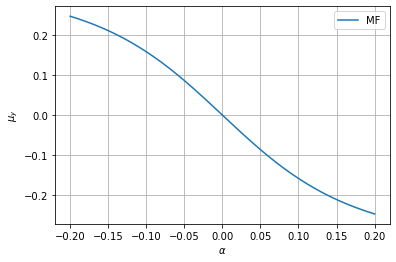

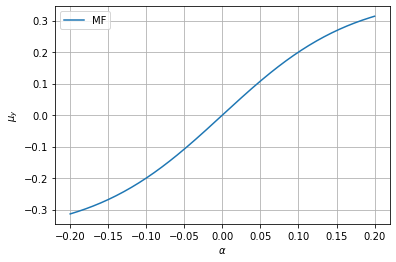

In [4]:
def get_open_loop_data(model, file_path):
    
    t,x_vect = model.do_open_loop_sim_from_csv(file_path)
    
    x = x_vect[:,0]
    y = x_vect[:,1]

    plt.plot(x,y)
    plt.axis()
    
    
    return t,x_vect

dt = 0.025 # = 1/40 = 1/control_frequency
file_path = get_folder_path()+'/open_loop_inputs/open_loop_commands.csv'
print(file_path)
N = get_csv_row_count(file_path)

open_loop_tf =N*dt

T_peak = 0.37
T_slope = 0.4

model2 = FourWheelModel_load_transfer(dt,open_loop_tf, T_peak, T_slope)
#t,x_vect_ref = get_open_loop_data(model2, file_path)
model2.tire.plot_pacejka_complicated()
model2.tire.plot_pacejka()

In [ ]:
# Example usage
def get_kpi(T_peak, T_slope, x_vect_ref):
    dt = 0.025 # = 1/40 = 1/control_frequency
    file_path = get_folder_path()+'/open_loop_inputs/open_loop_commands.csv'
    print(file_path)
    N = get_csv_row_count(file_path)
    open_loop_tf =N*dt

    model2 = BicycleModel(dt,open_loop_tf, T_peak, T_slope)
    t,x_vect = get_open_loop_data(model2, file_path)
    
    l2_norm_position = np.linalg.norm(x_vect_ref[:,:2] - x_vect[:,:2], axis=1).sum()
    l2_norm_velocity = np.linalg.norm(x_vect_ref[:,2:] - x_vect[:,2:], axis=1).sum()

    w1 = 0.5
    w2 = 0.5
    kpi = w1*l2_norm_position+w2*l2_norm_velocity
    return kpi



# Example usage
T_peak = 0.37
T_slope = 0.4
print(get_kpi(T_peak, T_slope, x_vect_ref))



NameError: name 'x_vect_ref' is not defined

In [12]:
print(get_folder_path())

/Users/jonas/Desktop/intergation_model


In [15]:

import os
folder_path = os.path.abspath("")

In [16]:
folder_path

'/Users/jonas/Desktop/intergation_model'

In [35]:
l2_norm_position = np.linalg.norm(np.array([[0,1],[2,3]]), axis=1).sum()
l2_norm_position

4.60555127546399

In [32]:
np.array([[0,1],[2,3]])

array([[0, 1],
       [2, 3]])

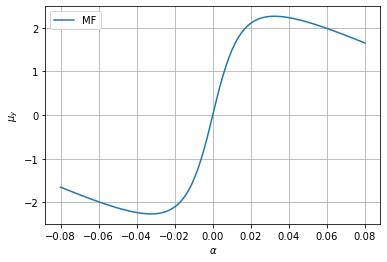

In [23]:
import numpy as np
import matplotlib.pyplot as plt

# Generate example data
alpha = np.linspace(-0.08, 0.08, 200)  # Example data for x-axis
B = 60.0
C = 0.9
D = 3.3663
E = 0.0
BCD = 6

# Calculate Pacejka coefficients
Fy = D * np.sin(C * np.arctan(B * alpha - E * (B * alpha - np.arctan(B * alpha)))) * (1.0 - BCD * np.abs(alpha))

# Plotting
plt.plot(alpha, Fy, label='MF')
plt.xlabel(r'$\alpha$')
plt.ylabel(r'$\mu_y$')
#plt.title('Pacejka Magic Formula')
plt.grid(True)
plt.legend()
plt.show()
